In [8]:
# Diese Zelle nur beim ersten Mal nötig, um PlantUML in Jupyter zu aktivieren
import iplantuml

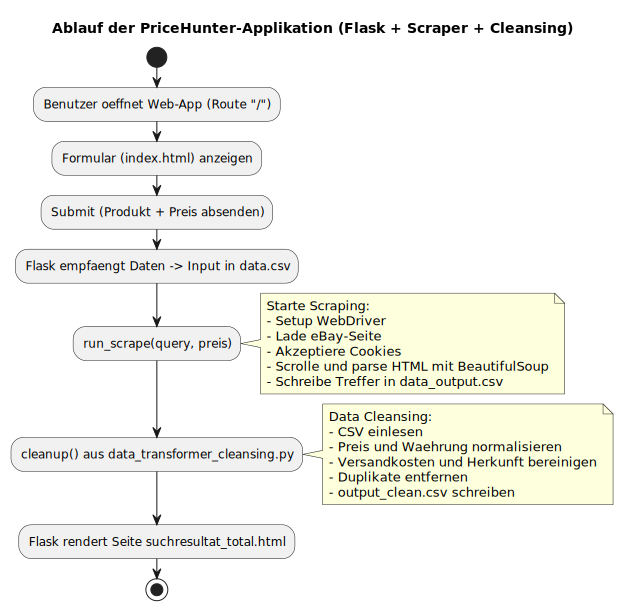

In [6]:
%%plantuml
@startuml
title Ablauf der PriceHunter-Applikation (Flask + Scraper + Cleansing)

start

:Benutzer oeffnet Web-App (Route "/");
:Formular (index.html) anzeigen;

:Submit (Produkt + Preis absenden);
:Flask empfaengt Daten -> Input in data.csv;
:run_scrape(query, preis);

note right
  Starte Scraping:
  - Setup WebDriver
  - Lade eBay-Seite
  - Akzeptiere Cookies
  - Scrolle und parse HTML mit BeautifulSoup
  - Schreibe Treffer in data_output.csv
end note

:cleanup() aus data_transformer_cleansing.py;

note right
  Data Cleansing:
  - CSV einlesen
  - Preis und Waehrung normalisieren
  - Versandkosten und Herkunft bereinigen
  - Duplikate entfernen
  - output_clean.csv schreiben
end note

:Flask rendert Seite suchresultat_total.html;
stop

@enduml

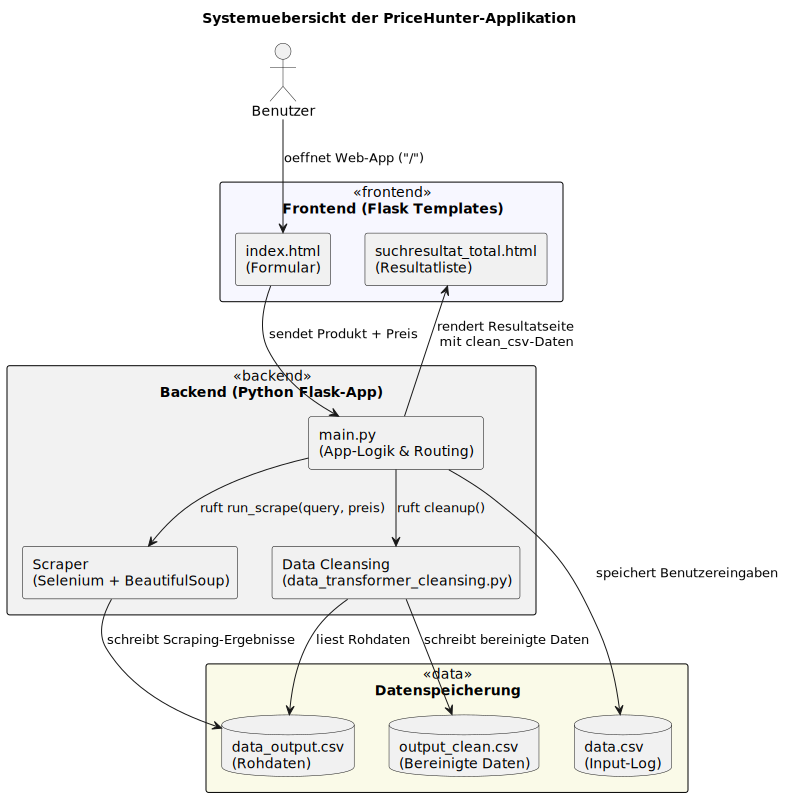

In [10]:
%%plantuml
@startuml
title **Systemuebersicht der PriceHunter-Applikation**

skinparam rectangle {
  BackgroundColor<<backend>> #F2F2F2
  BackgroundColor<<frontend>> #F7F7FF
  BackgroundColor<<data>> #FAFAE8
  BorderColor black
}

actor Benutzer as User

rectangle "Frontend (Flask Templates)" <<frontend>> {
  rectangle "index.html\n(Formular)" as form
  rectangle "suchresultat_total.html\n(Resultatliste)" as results
}

rectangle "Backend (Python Flask-App)" <<backend>> {
  rectangle "main.py\n(App-Logik & Routing)" as flask
  rectangle "Scraper\n(Selenium + BeautifulSoup)" as scraper
  rectangle "Data Cleansing\n(data_transformer_cleansing.py)" as cleansing
}

rectangle "Datenspeicherung" <<data>> {
  database "data.csv\n(Input-Log)" as data_csv
  database "data_output.csv\n(Rohdaten)" as raw_csv
  database "output_clean.csv\n(Bereinigte Daten)" as clean_csv
}

' --- Verbindungen ---
User --> form : oeffnet Web-App ("/")
form --> flask : sendet Produkt + Preis
flask --> scraper : ruft run_scrape(query, preis)
scraper --> raw_csv : schreibt Scraping-Ergebnisse

flask --> cleansing : ruft cleanup()
cleansing --> raw_csv : liest Rohdaten
cleansing --> clean_csv : schreibt bereinigte Daten

flask --> data_csv : speichert Benutzereingaben
flask --> results : rendert Resultatseite\nmit clean_csv-Daten

@enduml